# 1. Dataset cleaning

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats

Some lines don't end with quotation marks. Those lines are skipped by providing an additional argument in the ```read_csv()``` function.

In [2]:
df_world_cup_1 = pd.read_csv('../input/world_cup_from_14_06_2018_until_18_06_2018.csv', on_bad_lines = 'warn')
df_world_cup_1.head()

b'Skipping line 5981: expected 17 fields, saw 33\nSkipping line 10786: expected 17 fields, saw 21\nSkipping line 15623: expected 17 fields, saw 33\nSkipping line 21487: expected 17 fields, saw 32\nSkipping line 26355: expected 17 fields, saw 32\nSkipping line 31654: expected 17 fields, saw 21\n'
b'Skipping line 55791: expected 17 fields, saw 36\nSkipping line 55898: expected 17 fields, saw 34\n'
b'Skipping line 78228: expected 17 fields, saw 19\nSkipping line 91023: expected 17 fields, saw 20\n'
b'Skipping line 110779: expected 17 fields, saw 37\nSkipping line 114303: expected 17 fields, saw 37\nSkipping line 114336: expected 17 fields, saw 32\n'
b'Skipping line 131562: expected 17 fields, saw 37\nSkipping line 131781: expected 17 fields, saw 32\nSkipping line 134316: expected 17 fields, saw 19\nSkipping line 137046: expected 17 fields, saw 19\nSkipping line 140729: expected 17 fields, saw 37\nSkipping line 141144: expected 17 fields, saw 37\nSkipping line 141817: expected 17 fields, s

Unnamed: 0                                 id  likes_count       from_id  \
0        1:1   606721589343692_2268012329881268         3746  6.067216e+14   
1        1:2  2268012329881268_2268747486474419            3           NaN   
2        1:3  2268012329881268_2269012823114552            1           NaN   
3        1:4  2268012329881268_2269109076438260            0           NaN   
4        1:5  2268012329881268_2269149039767597            0  4.003176e+14   

                                           from_name  \
0                                     FIFA World Cup   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  <U+0633><U+0643><U+0627><U+0646> <U+0627><U+06...   

                                             message  \
0  Each 2018 FIFA World Cup spectator has the cha...   
1  I was #Ronaldo fan for 4 years. Finally it was...   
2  I already have my FAN ID in electronic format ...   
3  I<U+2019>m trying to buy tickets on the web si...   
4  <U+0644><U+0644><U+0646><U+0627><U+0633> <U+06...   

               created_time   type  \
0  2018-06-14T01:00:00+0000  video   
1  2018-06-14T01:04:33+0000    NaN   
2  2018-06-14T04:22:36+0000    NaN   
3  2018-06-14T05:48:22+0000    NaN   
4  2018-06-14T06:32:27+0000    NaN   

                                                link story  comments_count  \
0  https://www.facebook.com/fifaworldcup/videos/2...   NaN           131.0   
1                                                NaN   NaN             1.0   
2                                                NaN   NaN             2.0   
3                                                NaN   NaN             2.0   
4                                                NaN   NaN             0.0   

   shares_count  love_count  haha_count  wow_count  sad_count  angry_count  
0         160.0       135.0         3.0       69.0        3.0          2.0  
1           NaN         NaN         NaN        NaN        NaN          NaN  
2           NaN         NaN         NaN        NaN        NaN          NaN  
3           NaN         NaN         NaN        NaN        NaN          NaN  
4           NaN         NaN         NaN        NaN        NaN          NaN

In [3]:

df_world_cup_2 = pd.read_csv('../input/world_cup_from_23_06_2018_until_26_06_2018.csv', on_bad_lines = 'warn')
df_world_cup_2.head()

b'Skipping line 1285: expected 17 fields, saw 32\nSkipping line 1896: expected 17 fields, saw 32\nSkipping line 4874: expected 17 fields, saw 32\nSkipping line 5330: expected 17 fields, saw 32\nSkipping line 10574: expected 17 fields, saw 32\nSkipping line 20465: expected 17 fields, saw 32\n'
b'Skipping line 33234: expected 17 fields, saw 32\n'
b'Skipping line 71503: expected 17 fields, saw 19\nSkipping line 71914: expected 17 fields, saw 32\nSkipping line 84211: expected 17 fields, saw 19\nSkipping line 84443: expected 17 fields, saw 32\nSkipping line 86705: expected 17 fields, saw 32\nSkipping line 88865: expected 17 fields, saw 33\n'


Unnamed: 0                                 id  likes_count       from_id  \
0        1:1   606721589343692_2291596084189559         4042  6.067216e+14   
1        1:2  2291596084189559_2292419477440553           60           NaN   
2        1:3  2291596084189559_2292389254110242           69           NaN   
3        1:4  2291596084189559_2292396020776232           25           NaN   
4        1:5  2291596084189559_2292398844109283           20           NaN   

        from_name                                            message  \
0  FIFA World Cup  Hwang Heechan is confident <U+B300><U+D55C><U+...   
1             NaN  I love you South Korea. The food, culture, kpo...   
2             NaN  Why not? Japan beats Colombia so everything is...   
3             NaN  Dear #Fifa, it seems that you introduced this ...   
4             NaN  <U+0633><U+0644><U+0627><U+0645> <U+0628><U+06...   

               created_time   type  \
0  2018-06-23T01:00:01+0000  video   
1  2018-06-23T01:28:18+0000    NaN   
2  2018-06-23T01:07:48+0000    NaN   
3  2018-06-23T01:12:29+0000    NaN   
4  2018-06-23T01:14:20+0000    NaN   

                                                link story  comments_count  \
0  https://www.facebook.com/fifaworldcup/videos/2...   NaN           345.0   
1                                                NaN   NaN             6.0   
2                                                NaN   NaN            22.0   
3                                                NaN   NaN             7.0   
4                                                NaN   NaN             2.0   

   shares_count  love_count  haha_count  wow_count  sad_count  angry_count  
0         190.0       111.0       202.0       34.0        3.0          9.0  
1           NaN         NaN         NaN        NaN        NaN          NaN  
2           NaN         NaN         NaN        NaN        NaN          NaN  
3           NaN         NaN         NaN        NaN        NaN          NaN  
4           NaN         NaN         NaN        NaN        NaN          NaN

In [4]:
df_world_cup_1.shape

(205916, 17)

In [5]:
df_world_cup_2.shape

(89068, 17)

Merging the two dataframes.

In [6]:
df_world_cup = pd.concat([df_world_cup_1, df_world_cup_2], axis=0)
df_world_cup.shape

(294984, 17)

Dropping irrelevant columns.

In [7]:
to_drop = ['Unnamed: 0', 'id', 'likes_count', 'from_id', 'from_name', 'created_time', 'type', 'link', 'story', 'comments_count', 'shares_count']
df_world_cup.drop(columns=to_drop, axis=1, inplace=True)

Droping rows which contain NA values.

In [8]:
df_world_cup.dropna(how='any', inplace=True)
df_world_cup.shape

(292, 6)

Removing duplicates.

In [9]:
df_world_cup.drop_duplicates(inplace=True)
df_world_cup.shape

(292, 6)

Checking data types.

In [10]:
df_world_cup.dtypes

message         object
love_count     float64
haha_count     float64
wow_count      float64
sad_count      float64
angry_count    float64
dtype: object

Detecting outliers.

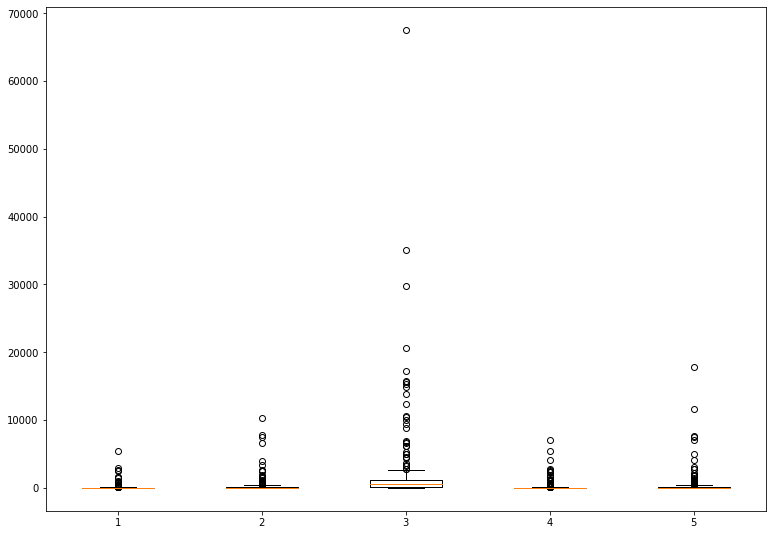

In [11]:
data = [df_world_cup['angry_count'], df_world_cup['haha_count'], df_world_cup['love_count'], df_world_cup['sad_count'], df_world_cup['wow_count']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(data)
plt.show()

Removing NA rows and rows which contain no emotions. 

In [12]:
emotions = ['angry_count', 'haha_count', 'love_count', 'sad_count', 'wow_count']
df_world_cup = df_world_cup[(np.abs(stats.zscore(df_world_cup[emotions])) < 3).all(axis=1)]

In [13]:
df_world_cup.head()

message  love_count  \
0    Each 2018 FIFA World Cup spectator has the cha...       135.0   
123  We are rivals, but we live <U+26BD> together! ...       622.0   
358  Once again the pitches and locker rooms of the...       785.0   
770  On the eve of the 2018 FIFA World Cup, adidas ...      1224.0   
969  The energy is rising.<U+26BD> fans across the ...      1148.0   

     haha_count  wow_count  sad_count  angry_count  
0           3.0       69.0        3.0          2.0  
123        24.0       79.0       11.0          4.0  
358       728.0       41.0       10.0         21.0  
770        11.0      580.0        6.0          6.0  
969        15.0       90.0        4.0          3.0

99% percent of the dataset was removed. Most of them had no reactions at all. 

In [14]:
df_world_cup.shape

(275, 6)

In [15]:
df_world_cup.to_pickle("./pkl/world_cup/document_by_emotion_df.pkl")